Test Accuracy LE: 0.5022
Train Accuracy LE: 0.5000285714285714
[0]	validation_0-mlogloss:1.07921	validation_1-mlogloss:1.07915
[1]	validation_0-mlogloss:1.06535	validation_1-mlogloss:1.06520
[2]	validation_0-mlogloss:1.05537	validation_1-mlogloss:1.05518
[3]	validation_0-mlogloss:1.04818	validation_1-mlogloss:1.04798
[4]	validation_0-mlogloss:1.04294	validation_1-mlogloss:1.04274
[5]	validation_0-mlogloss:1.03916	validation_1-mlogloss:1.03900
[6]	validation_0-mlogloss:1.03638	validation_1-mlogloss:1.03628
[7]	validation_0-mlogloss:1.03435	validation_1-mlogloss:1.03432
[8]	validation_0-mlogloss:1.03284	validation_1-mlogloss:1.03289
[9]	validation_0-mlogloss:1.03172	validation_1-mlogloss:1.03181
[10]	validation_0-mlogloss:1.03089	validation_1-mlogloss:1.03114
[11]	validation_0-mlogloss:1.03026	validation_1-mlogloss:1.03060
[12]	validation_0-mlogloss:1.02979	validation_1-mlogloss:1.03020
[13]	validation_0-mlogloss:1.02941	validation_1-mlogloss:1.02992
[14]	validation_0-mlogloss:1.02909	va

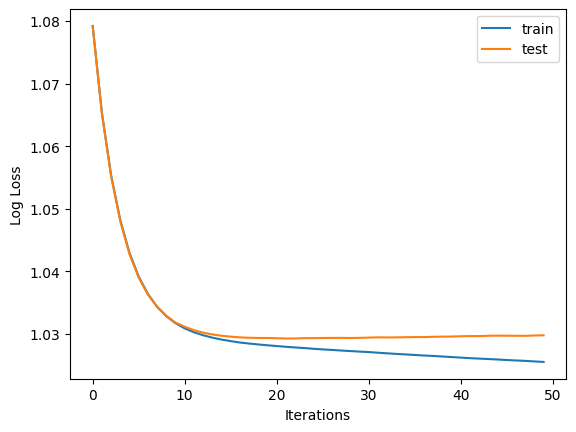

In [29]:
# Import required libs
import pandas as pd
# from IPython.display import display
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot

# Load dataset
heartattack_all_LE = pd.read_csv('datasets/heart_attack_risk_dataset.csv')
heartattack_LE_OHE = pd.read_csv('datasets/heart_attack_risk_dataset.csv')

# Initialize Encoders
leGender = LabelEncoder()       # Female, Male
leHML = LabelEncoder()          # High, Moderate, Low
leChestPain = LabelEncoder()    # Non-anginal, Asymptomatic, Typical, Atypical
leThalassemia = LabelEncoder()  # Normal, Fixed Defect, Reversible Defect
leECG = LabelEncoder()          # Normal, ST-T abnormality, Left ventricular hypertrophy

# Encode categorical columns using LE
heartattack_all_LE['Gender'] = leGender.fit_transform(heartattack_all_LE['Gender'])

heartattack_all_LE['Physical_Activity_Level'] = leHML.fit_transform(heartattack_all_LE['Physical_Activity_Level'])
heartattack_all_LE['Stress_Level'] = leHML.fit_transform(heartattack_all_LE['Stress_Level'])
heartattack_all_LE['Heart_Attack_Risk'] = leHML.fit_transform(heartattack_all_LE['Heart_Attack_Risk'])

heartattack_all_LE['Chest_Pain_Type'] = leChestPain.fit_transform(heartattack_all_LE['Chest_Pain_Type'])
heartattack_all_LE['Thalassemia'] = leThalassemia.fit_transform(heartattack_all_LE['Thalassemia'])
heartattack_all_LE['ECG_Results'] = leECG.fit_transform(heartattack_all_LE['ECG_Results'])

# Split DF into Features and Labels
Features_he_all_LE = heartattack_all_LE.iloc[:, :19]
Labels_he_all_LE = heartattack_all_LE.iloc[:, 19:]

# Splitting into Train- and Test-sets
f_train_he_le, f_test_he_le, l_train_he_le, l_test_he_le = train_test_split(
    Features_he_all_LE, 
    Labels_he_all_LE, 
    test_size=0.3, 
    random_state=38
)

# Initialising XGB Classifier

# xgbc =  XGBClassifier()
# xgbc =  XGBClassifier(n_estimators=5, max_depth=2, learning_rate=1, objective='binary:logistic')
xgbc_le =  XGBClassifier(
    objective='multi:softmax',  # Specify the multi-class classification task
    num_class=3,                # Number of classes (Low, Moderate, High)
    max_depth=2,                # Maximum depth of the trees
    learning_rate=0.2,          # Learning rate for the model
    n_estimators=50,            # Number of boosting rounds (iterations)
    random_state=0              # Set random state for reproducibility
)

# Fitting and Predicting
xgbc_le.fit(f_train_he_le, l_train_he_le)
test_preds = xgbc_le.predict(f_test_he_le)
train_preds= xgbc_le.predict(f_train_he_le)

# Evaluation
print(f'Test Accuracy LE: {accuracy_score(l_test_he_le, test_preds)}')
print(f'Train Accuracy LE: {accuracy_score(l_train_he_le, train_preds)}')

# https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

# define the datasets to evaluate each iteration
model = XGBClassifier(objective='multi:softmax',  # Specify the multi-class classification task
    num_class=3,                # Number of classes (Low, Moderate, High)
    max_depth=2,                # Maximum depth of the trees
    learning_rate=0.2,          # Learning rate for the model
    n_estimators=50,            # Number of boosting rounds (iterations)
    random_state=0,             # Set random state for reproducibility
    eval_metric='mlogloss'      # alternativ: eval_metric='merror'
)
evalset = [(f_train_he_le, l_train_he_le), (f_test_he_le, l_test_he_le)]


# fit the model
model.fit(f_train_he_le, l_train_he_le, eval_set=evalset)

yhat = model.predict(f_test_he_le)
score = accuracy_score(l_test_he_le, yhat)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = model.evals_result()

pyplot.xlabel('Iterations')
pyplot.ylabel('Log Loss')
# plot learning curves
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# pyplot.plot(results['validation_0']['merror'], label='train')
# pyplot.plot(results['validation_1']['merror'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(type(results))
print(results.keys())
print(results['validation_0'])
print(results['validation_0'].keys())
print(type(results['validation_0']['mlogloss']))
print(min(results['validation_0']['mlogloss']))
print(max(results['validation_0']['mlogloss']))
print(min(results['validation_1']['mlogloss']))
print(max(results['validation_1']['mlogloss']))

<class 'dict'>
dict_keys(['validation_0', 'validation_1'])
OrderedDict([('mlogloss', [1.0792134557247162, 1.065349523283754, 1.055369338474955, 1.0481806114775793, 1.0429384974939482, 1.0391648126125335, 1.0363760868549348, 1.0343457761526107, 1.0328350935288837, 1.0317154232059207, 1.0308854320679393, 1.0302641599229403, 1.0297856512580599, 1.0294054531097412, 1.0290938353742871, 1.028847738797324, 1.0286232942853655, 1.0284637464063509, 1.028315294464997, 1.028179728097575, 1.028064822944573, 1.0279404353499413, 1.0278364110997744, 1.0277394016981125, 1.0276235204901014, 1.0275275685071945, 1.0274426536951746, 1.0273460192152433, 1.0272603669268745, 1.02717563692161, 1.0271012052893638, 1.026996206848962, 1.0268966295889446, 1.0268038549848966, 1.0267211324725831, 1.0266364939332009, 1.0265486832993371, 1.0264812821354186, 1.0263851597138813, 1.0263023863451821, 1.026214498289994, 1.026126071855, 1.0260568464483533, 1.025985340808119, 1.025915329177039, 1.025826967705999, 1.025754997